<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/Modelo_Retencion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# paquetes necesarios
!pip install pycaret # Modelos ML
!pip install gender_guesser # Estimación de género

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
import matplotlib.pyplot as plt # Visualizaciones
import keyword # Listado de palabras reservadas
from wordcloud import WordCloud # Nube de palabras
import gender_guesser.detector as gender # Estimación de género a partir del primer y segundo nombre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0

# obtención de datos

In [2]:
from google.colab import files
import pandas as pd
# Cargar el archivo CSV
uploaded = files.upload()

Saving Modelo_retencion.xlsx to Modelo_retencion.xlsx


In [17]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/Modelo_retencion.xlsx'

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)

In [18]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])
# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes.head(60))

DocumentoCliente                       int64
Ahorro de la red                       int64
CDT                                    int64
Cartera vendida                        int64
Castigados                             int64
Crédito hipotecario                    int64
Crédito libre inversión                int64
Crédito vehículo                       int64
Cuenta corriente                       int64
FlexiDigital                           int64
Leasing vehículo                       int64
Libranza                               int64
Maquina agrícola                       int64
Nomina Finandina                       int64
Otros activos                          int64
Otros ahorros                          int64
Plan mayor                             int64
Redescuentos                           int64
TDC Digital                            int64
TDC Física                             int64
pqr                                    int64
Ataques                                int64
login_prom

In [19]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

FVDSC1                               50.0
name2                                28.0
ActividadEconomica                   21.0
Deuda financiera-TodasObligFinanc     5.0
RangoEdad                             5.0
Riesgo                                5.0
Acierta_Master                        5.0
Deuda financiera con Finandina        5.0
Municipio                             1.0
name1                                 1.0
DocumentoCliente                      0.0
antiguedad                            0.0
Ingresos                              0.0
TRXTDC                                0.0
fechamin                              0.0
TRXTD                                 0.0
productos_Activo_hoy                  0.0
productos                             0.0
tiene_moras                           0.0
productos_activo                      0.0
Cupo_total_activo                     0.0
mora_activo                           0.0
cuentas_ahorro                        0.0
productos_tdc                     

# Preparación y limpieza de datos

In [20]:
datos['Genero'] = None

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Aplicar la función a las dos columnas
datos['Genero_estimado_1'] = estimar_genero_por_bloques(datos['name1'])
datos['Genero_estimado_2'] = estimar_genero_por_bloques(datos['name2'])

datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()

Genero
Masculino    127124
Femenino      61882
Name: count, dtype: int64

In [21]:
# limpieza de datos
for col in datos.columns:
    if datos[col].dtype == 'object':  # Verificar si la columna es de tipo string
        datos[col] = datos[col].fillna('sininformacion')  # Reemplazar valores faltantes
        datos[col] = datos[col].astype(str).str.lstrip().str.rstrip().str.strip()  # Aplicar strip a los valores
    elif np.issubdtype(datos[col].dtype, np.number):  # Verificar si la columna es de tipo numérico
        promedio = datos[col].mean()  # Calcular el promedio de la columna
        datos[col] = datos[col].fillna(promedio)

In [22]:
import pandas as pd
import numpy as np

# Asegúrate de que todas las variables sean numéricas
numerical_data = datos.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Establecer un umbral para alta correlación
threshold = 0.8

# Seleccionar las parejas de variables con alta correlación
high_corr_var = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Imprimir las parejas de variables con alta correlación
print("Variables con alta correlación (umbral > 0.8):")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")


Variables con alta correlación (umbral > 0.8):
tiene_moras y retener tienen una correlación de -0.83


In [8]:
datos.columns

Index(['DocumentoCliente', 'Ahorro de la red', 'CDT', 'Cartera vendida',
       'Castigados', 'Crédito hipotecario', 'Crédito libre inversión',
       'Crédito vehículo', 'Cuenta corriente', 'FlexiDigital',
       'Leasing vehículo', 'Libranza', 'Maquina agrícola', 'Nomina Finandina',
       'Otros activos', 'Otros ahorros', 'Plan mayor', 'Redescuentos',
       'TDC Digital', 'TDC Física', 'Departamento', 'Municipio', 'TipoPersona',
       'CodigoCIIU', 'ActividadEconomica', 'pqr', 'Ataques', 'login_promedio',
       'fechamin', 'activohoy', 'antiguedad', 'FVDSC1', 'RangoEdad', 'name1',
       'name2', 'Ingresos', 'Riesgo', 'Acierta_Master',
       'Deuda financiera con Finandina', 'Deuda financiera-TodasObligFinanc',
       'TRXTDC', 'TRXTD', 'productos_Activo_hoy', 'productos', 'tiene_moras',
       'productos_activo', 'Cupo_total_activo', 'mora_activo',
       'cuentas_ahorro', 'productos_tdc', 'Cupo_total_tdc', 'mora_tdc',
       'retener', 'Genero', 'Genero_estimado_1', 'Genero_es

In [23]:
datos = datos.drop(columns={'fechamin','FVDSC1','ActividadEconomica','CodigoCIIU','Genero_estimado_1','Genero_estimado_2','tiene_moras','mora_tdc','mora_activo','name1','name2'})

# Testeo y Entrenamiento

In [24]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (141754, 47)
Tamaño del conjunto de prueba: (47252, 47)


In [25]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación
#exp_clf101 = setup(data=data, target='retener', session_id=10001)
exp_clf101 = setup(
    data=data,               # El DataFrame que contiene los datos a usar
    target='retener',        # La columna objetivo que se quiere predecir
    session_id=550055,        # Un número para establecer la semilla del generador de números aleatorios para reproducibilidad
    fold_strategy='stratifiedkfold',  # Estrategia de validación cruzada estratificada, asegura que cada fold tenga la misma proporción de cada clase
    preprocess=True,         # Si se debe realizar preprocesamiento en los datos
    imputation_type='simple',# Tipo de imputación a utilizar, 'simple' indica técnicas simples de imputación
    numeric_imputation='mean',# Método de imputación para variables numéricas, aquí se usa la media de la columna
    categorical_imputation='mode', # Método de imputación para variables categóricas, aquí se usa la moda (el valor más frecuente)
    max_encoding_ohe=25      # Número máximo de categorías para usar one-hot encoding, si hay más de 25 categorías, se utilizarán otras técnicas de codificación
)


,Description,Value
0,Session id,550055
1,Target,retener
2,Target type,Binary
3,Original data shape,"(141754, 47)"
4,Transformed data shape,"(141754, 60)"
5,Transformed train set shape,"(99227, 60)"
6,Transformed test set shape,"(42527, 60)"
7,Numeric features,38
8,Categorical features,8
9,Preprocess,True


In [26]:
best_model=compare_models()

# Comparar solo algunos modelos específicos
#models_to_compare = ['lr', 'dt', 'rf', 'xgboost', 'knn']  # Lista de modelos a incluir
#best_model = compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8263,0.8910,0.9106,0.8294,0.8681,0.6153,0.6211,25.8010
rf,Random Forest Classifier,0.8257,0.8926,0.9074,0.8306,0.8673,0.6147,0.6198,31.5980
lightgbm,Light Gradient Boosting Machine,0.8253,0.8926,0.9038,0.8324,0.8666,0.6147,0.6192,7.5320
xgboost,Extreme Gradient Boosting,0.8234,0.8906,0.8966,0.8344,0.8644,0.6121,0.6154,4.3460
gbc,Gradient Boosting Classifier,0.8143,0.8776,0.9139,0.8134,0.8607,0.5850,0.5940,44.6500
ada,Ada Boost Classifier,0.8038,0.8629,0.8956,0.8115,0.8515,0.5646,0.5706,10.5920
ridge,Ridge Classifier,0.8017,0.8488,0.9089,0.8018,0.8520,0.5553,0.5654,1.5320
lda,Linear Discriminant Analysis,0.8017,0.8486,0.9064,0.8032,0.8517,0.5561,0.5654,2.1550
qda,Quadratic Discriminant Analysis,0.7534,0.8327,0.7714,0.8302,0.7960,0.4823,0.4955,1.9840
dt,Decision Tree Classifier,0.7531,0.7372,0.7994,0.8059,0.8026,0.4731,0.4731,4.3660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- El Extra Trees Classifier (Extremely Randomized Trees Classifier) es un algoritmo de ensamblaje que utiliza múltiples árboles de decisión para mejorar la precisión del modelo y controlar el sobreajuste. Este clasificador es una variación del algoritmo de bosques aleatorios (Random Forest).

# Definición

- El Extra Trees Classifier crea varios árboles de decisión (de manera similar a un Random Forest), pero introduce aún más aleatoriedad en el proceso de construcción de los árboles. En lugar de buscar los mejores puntos de corte para dividir los datos, los puntos de corte se seleccionan de forma aleatoria. La predicción final se hace promediando (para regresión) o votando (para clasificación) las predicciones de todos los árboles.

Ventajas

- Reducción del Sobreajuste: La aleatoriedad adicional ayuda a reducir el sobreajuste (overfitting) en comparación con un solo árbol de decisión.

- Velocidad: La construcción de los árboles es generalmente más rápida porque se evita la búsqueda exhaustiva de los mejores puntos de corte.
- Precisión: Suele proporcionar una alta precisión en una variedad de tareas de clasificación y regresión, similar a Random Forest.
- Robustez: Es robusto a los valores atípicos y a las características irrelevantes debido a la aleatoriedad adicional.
- Interpretabilidad: Aunque es un modelo de ensamblaje, aún puede ser más interpretable que otros modelos de caja negra como las redes neuronales.

Desventajas

- Menor Interpretabilidad: Aunque más interpretable que algunas técnicas, los modelos de ensamblaje de árboles en general son menos interpretables que un único árbol de decisión.
- Sensibilidad a Datos de Alta Dimensionalidad: Puede volverse menos eficiente con datos de muy alta dimensionalidad.
Requiere Ajuste de Hiperparámetros: Para obtener el mejor rendimiento, puede ser necesario ajustar varios hiperparámetros, lo cual puede ser computacionalmente costoso.
- No Inherentemente Escalable: Para conjuntos de datos extremadamente grandes, puede no ser tan escalable como otros algoritmos diseñados específicamente para grandes volúmenes de datos.


Conceptos Clave del Extra Trees Classifier

- Ensamblaje de Árboles: El modelo consiste en un gran número de árboles de decisión, cada uno construido a partir de una muestra del conjunto de datos de entrenamiento.
- Aleatoriedad en la Selección de Características: Al igual que en Random Forest, cada árbol se construye a partir de una submuestra aleatoria de las características.
- Aleatoriedad en los Puntos de Corte: A diferencia de Random Forest, que selecciona el mejor punto de corte para cada división basada en algún criterio (por ejemplo, Gini o Entropía), el Extra Trees Classifier selecciona los puntos de corte de manera completamente aleatoria dentro de los rangos posibles de los datos.
- Predicción mediante Agregación: Para clasificar una nueva instancia, cada árbol del modelo hace una predicción, y la predicción final del modelo es el voto mayoritario (para clasificación) o el promedio (para regresión) de todas las predicciones individuales de los árboles.

Ventajas del Extra Trees Classifier

- Reducción del Sobreajuste: La aleatoriedad adicional en la selección de los puntos de corte ayuda a reducir el sobreajuste en comparación con los modelos de árboles individuales o incluso Random Forest.
Rapidez: Debido a que no se buscan los mejores puntos de corte, sino que se seleccionan aleatoriamente, la construcción de los árboles es generalmente más rápida.

- Precisión y Robustez: Proporciona una alta precisión y es robusto a valores atípicos y características irrelevantes debido a la aleatoriedad adicional.
Desventajas del Extra Trees Classifier
- Menor Interpretabilidad: Aunque es más interpretable que algunos modelos complejos como las redes neuronales, sigue siendo menos interpretable que un único árbol de decisión.
- Requiere Ajuste de Hiperparámetros: Puede requerir ajustes en sus hiperparámetros para lograr el mejor rendimiento, lo cual puede ser computacionalmente costoso.

In [27]:
modelo = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8257,0.8882,0.9075,0.8305,0.8673,0.6146,0.6198
1,0.8205,0.8911,0.9018,0.8278,0.8632,0.6038,0.6085
2,0.8306,0.8932,0.9111,0.8343,0.8710,0.6257,0.6308
3,0.8256,0.8862,0.9120,0.8277,0.8678,0.6132,0.6194
4,0.8283,0.8961,0.9083,0.8332,0.8691,0.6208,0.6257
5,0.8220,0.8851,0.9095,0.8250,0.8652,0.6052,0.6115
6,0.8275,0.8946,0.9117,0.8302,0.8691,0.6179,0.6237
7,0.8340,0.8972,0.9170,0.8349,0.8740,0.6323,0.6383
8,0.8235,0.8888,0.9141,0.8240,0.8668,0.6076,0.6148


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8065,0.8511,0.9231,0.7996,0.8570,0.5628,0.5768
1,0.8115,0.8510,0.9294,0.8019,0.8610,0.5735,0.5887
2,0.8131,0.8498,0.9276,0.8045,0.8617,0.5778,0.5919
3,0.8060,0.8465,0.9247,0.7983,0.8568,0.5610,0.5758
4,0.8171,0.8592,0.9297,0.8079,0.8645,0.5872,0.6011
5,0.8062,0.8413,0.9292,0.7962,0.8576,0.5600,0.5766
6,0.8110,0.8531,0.9279,0.8022,0.8605,0.5726,0.5873
7,0.8115,0.8544,0.9300,0.8016,0.8610,0.5732,0.5886
8,0.8114,0.8479,0.9337,0.7996,0.8615,0.5718,0.5889


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


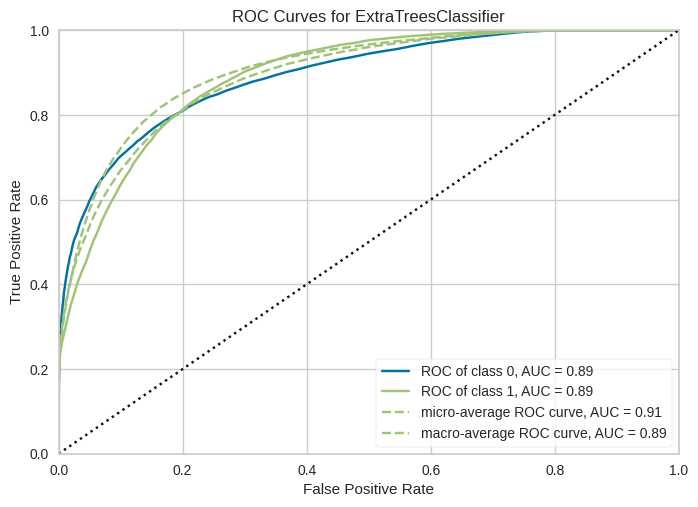

In [29]:
plot_model(tuned_modelo,plot='auc')

In [30]:
plot_model(tuned_modelo,plot='threshold')

KeyboardInterrupt: 

<Figure size 800x550 with 0 Axes>

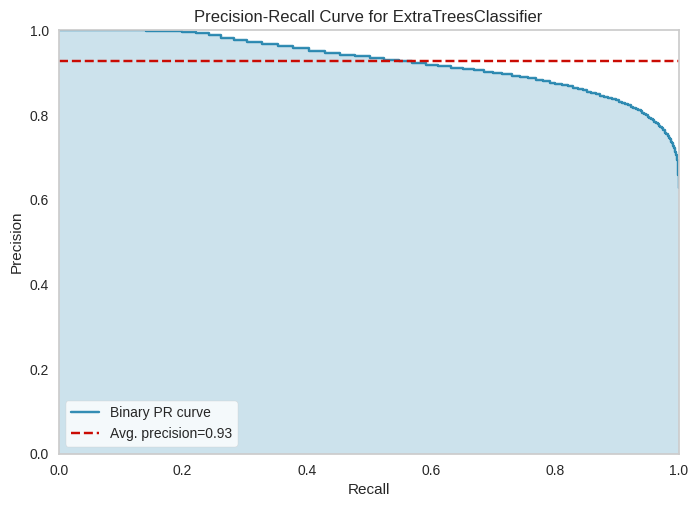

In [31]:
plot_model(tuned_modelo,plot='pr')

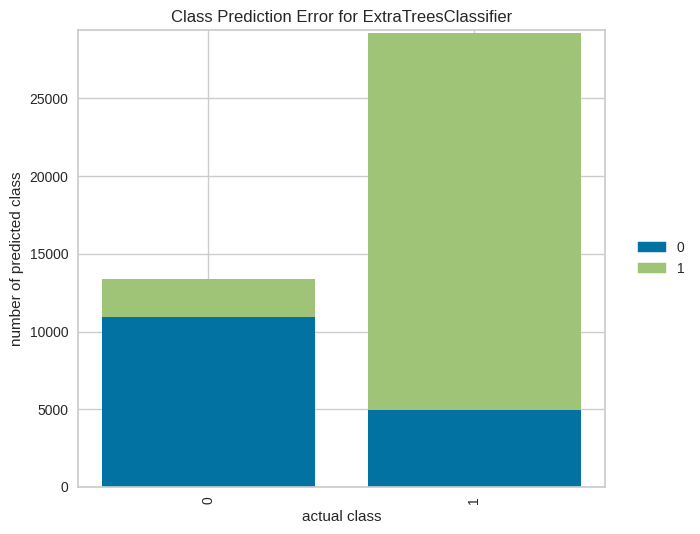

In [32]:
plot_model(tuned_modelo,plot='error')

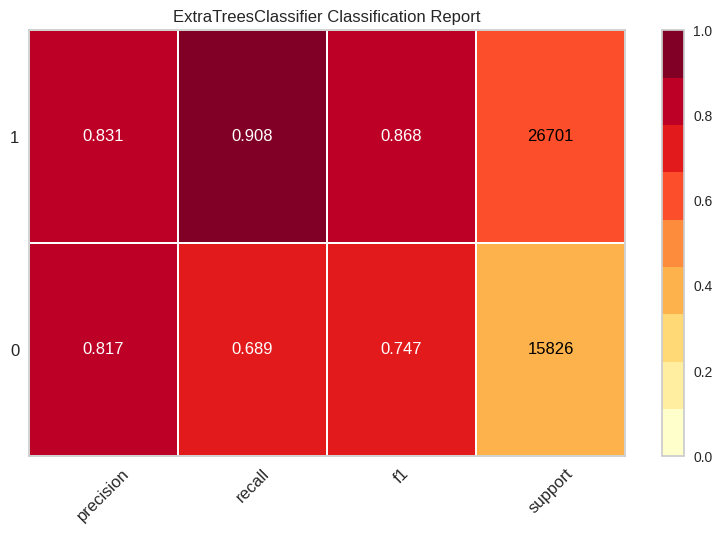

In [33]:
plot_model(tuned_modelo,plot='class_report')

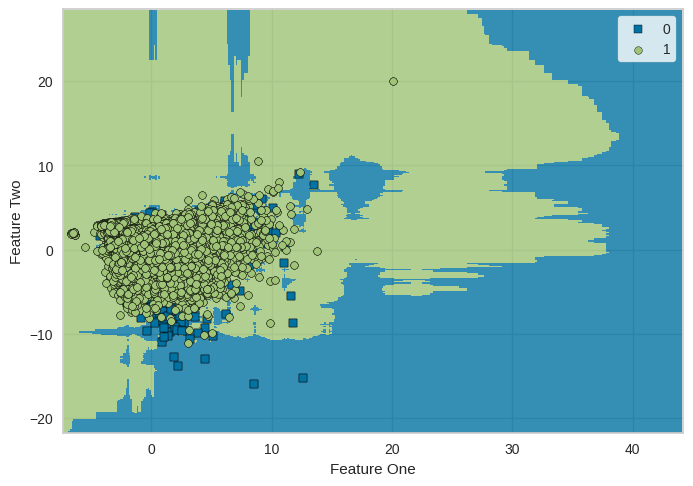

In [34]:
plot_model(tuned_modelo,plot='boundary')

KeyboardInterrupt: 

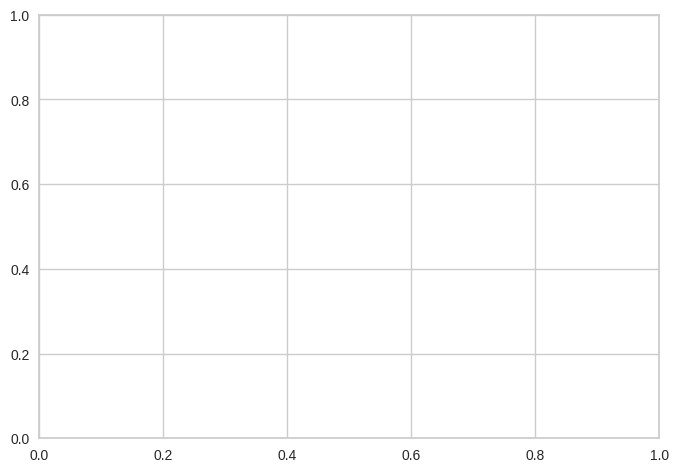

In [35]:
plot_model(tuned_modelo,plot='rfe')

In [ ]:
plot_model(tuned_modelo,plot='learning')

In [ ]:
plot_model(tuned_modelo,plot='manifold')

In [ ]:
plot_model(tuned_modelo,plot='calibration')

In [ ]:
plot_model(tuned_modelo,plot='vc')

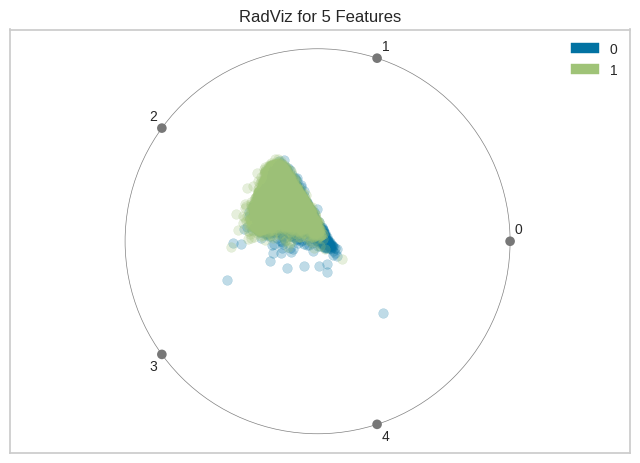

In [44]:
plot_model(tuned_modelo,plot='dimension')

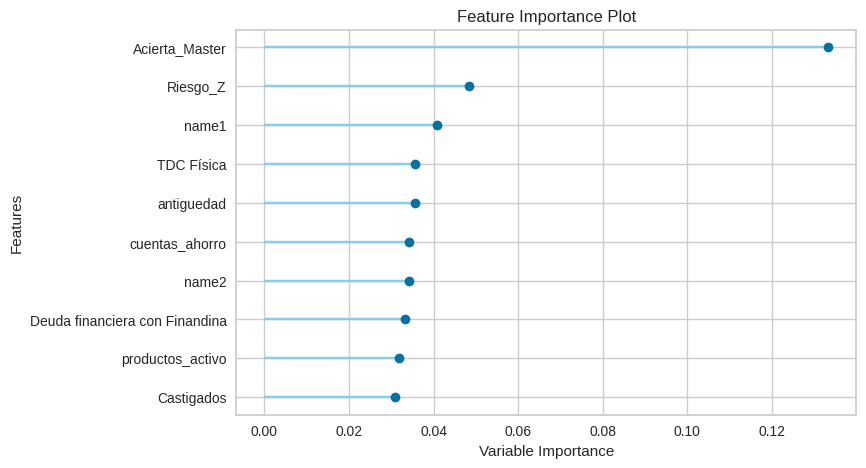

In [36]:
plot_model(tuned_modelo,plot='feature')

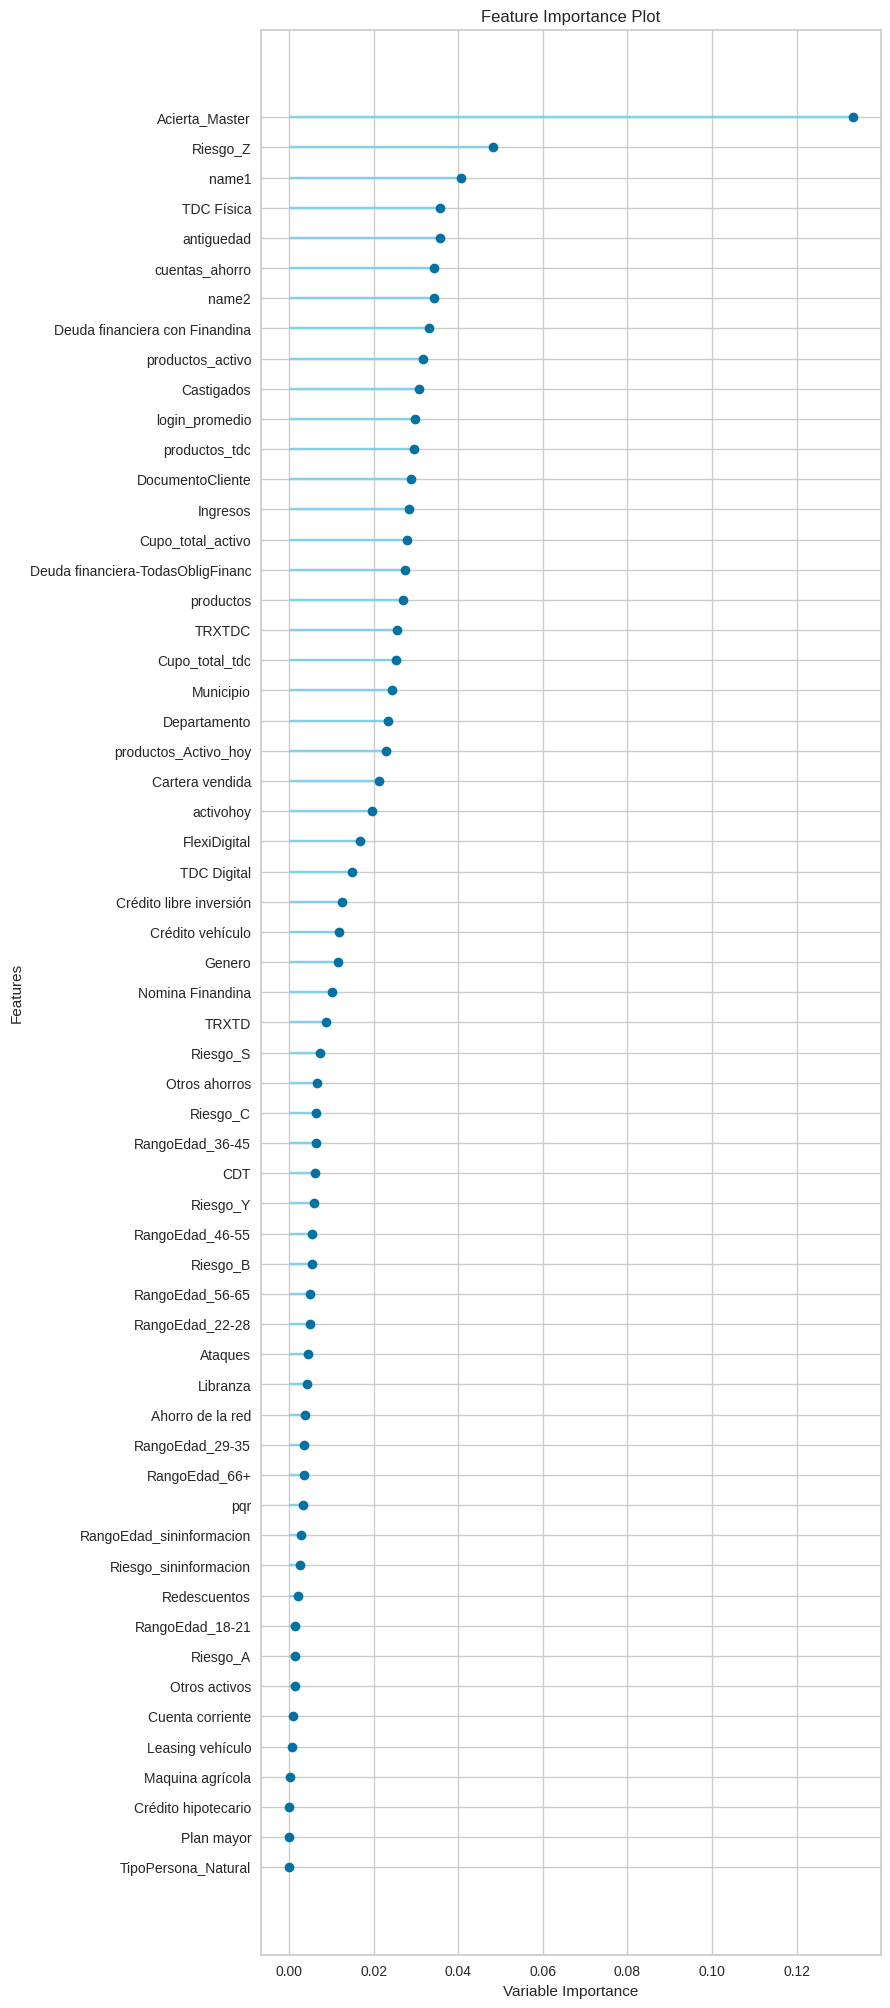

In [37]:
plot_model(tuned_modelo,plot='feature_all')

In [38]:
plot_model(tuned_modelo,plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


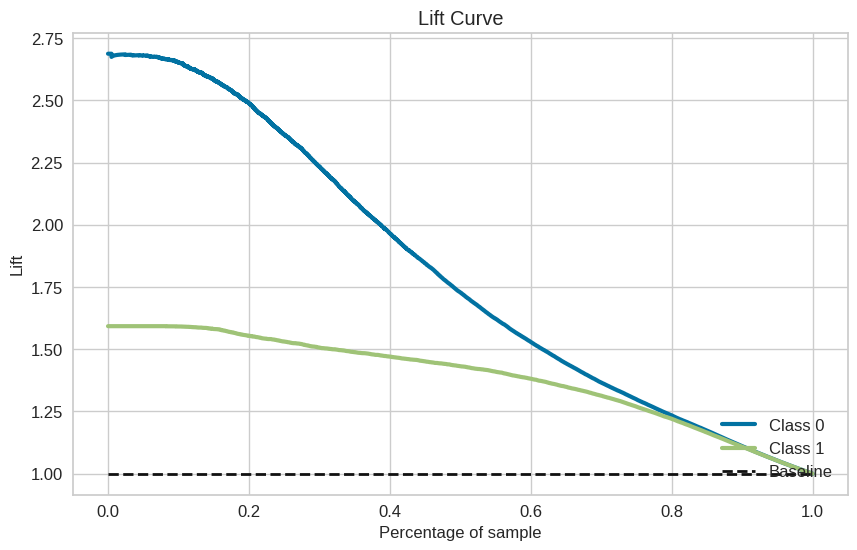

In [39]:
plot_model(tuned_modelo,plot='lift')

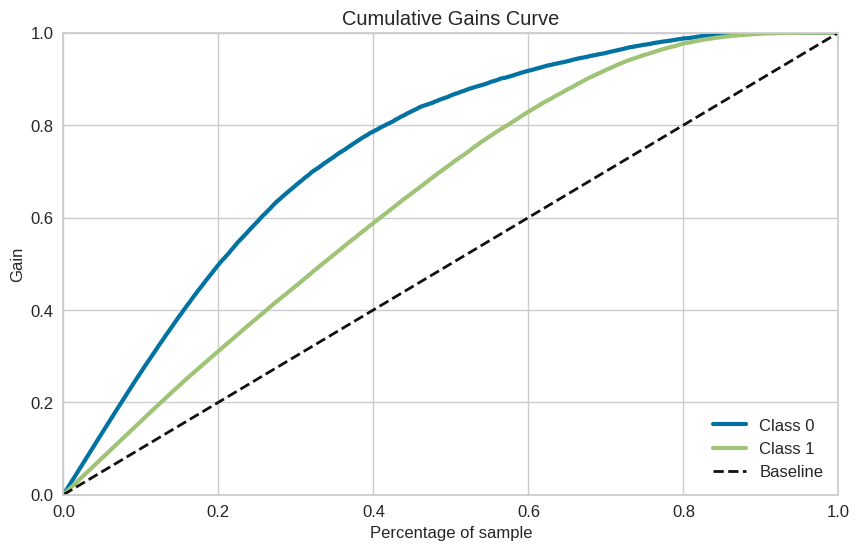

In [40]:
plot_model(tuned_modelo,plot='gain')

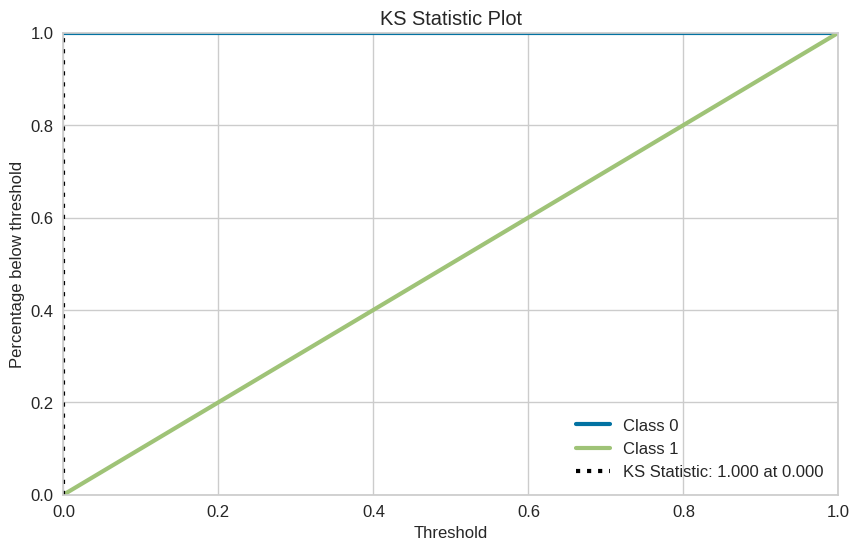

In [41]:
plot_model(tuned_modelo,plot='ks')

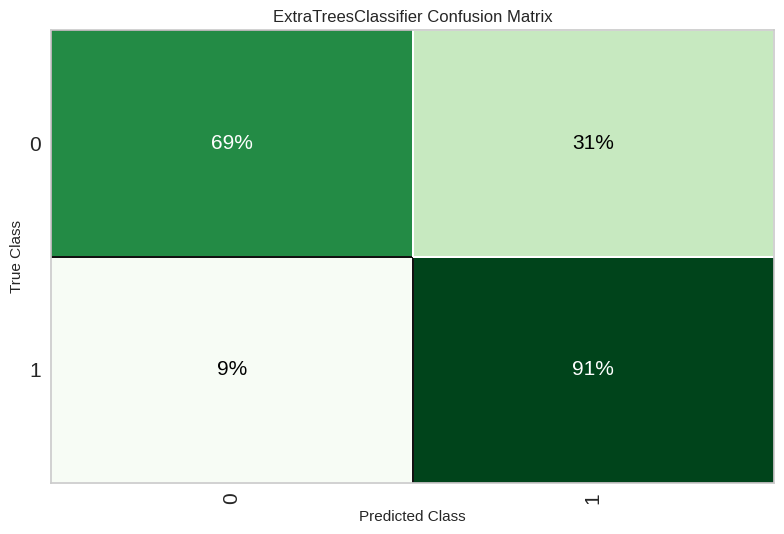

In [43]:
plot_model(tuned_modelo, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

predicciones.head()

In [ ]:
# modelo final entrenado con todo el conjunto de datos
final_modelo=finalize_model(tuned_modelo)

In [ ]:
print(final_modelo)

In [ ]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'ModeloPrepagoRetencion'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")
